In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from diagnostics import *

colors = sns.color_palette()

In [2]:
# Extra parameters
folder = '../result_files/'
paramfile = '../model/test.param.000'
burnin = 0
second_thinning = 1

---------------------------------------
## Read the InputParam file

In [3]:
params = open(paramfile)

InputParams = {}
ThetaParams = {}            

for row in params:
    if row[:22] == 'PARAMETER START VALUES':
        break
        
    if (row[0] != '#') and not (row[:3].isupper()):
        param_type = row.split(',')[-1].strip()
        if param_type == 'char*' or param_type=='string':
            InputParams[row.split(',')[-2][1:]] = row[:12].replace(' ','')
        if param_type == 'int':
            InputParams[row.split(',')[-2][1:]] = int(row[:12].replace(' ',''))
        if param_type == 'float':
            InputParams[row.split(',')[-2][1:]] = float(row[:12].replace(' ',''))
        if param_type == 'intvec':
            if row[1]==':': 
                InputParams[row.split(',')[-2][1:]] = np.asarray([1])            
            else:
                var_cols = np.asarray([int(i) for i in row[:12].split(' ') if i!=''])
                InputParams[row.split(',')[-2][1:]] = var_cols
            
for row in params:
    if not (row[:3].isupper()):
        par = row.rsplit(' ', maxsplit=1)[-1].strip()
        ThetaParams[par] = [float(row.lstrip().split(' ')[0])]
        fixed = row.lstrip().split(' ', maxsplit=1)[1].lstrip().split(' ')[0]
        number = row.lstrip().split(' ', maxsplit=1)[1].lstrip().split(' ', maxsplit=1)[1].lstrip().split(' ')[0]
        ThetaParams[par] = ThetaParams[par] + [int(fixed)]
        ThetaParams[par] = ThetaParams[par] + [int(number)]
    else:
        break
        
for row in params:
    if not (row[:3].isupper()):
        par = row.rsplit(' ', maxsplit=1)[-1].strip()
        ThetaParams[par] = ThetaParams[par] + [float(row.lstrip().split(' ')[0])]
    else:
        break

In [4]:
pd.DataFrame(data=InputParams).T

0
M                              12
N                             500
ask_print                       1
datafilename             data.dat
draw_from_prior                 0
iseed                  1741133992
lag_hac                         0
lag_hac_gmm                     1
lag_obs_factor                  1
len_model_func                  1
len_model_param                26
len_simul                     100
model_paramfile          __none__
no_sandwich                     1
num_mcmc_draws              10000
num_mcmc_files                  9
numb_obs_factor                 2
numb_returns                    8
particle_update                50
project_name                 test
proposal_scale_factor          10
proposaltype                    0
sample_size                   200
temperature                     1
thin                            5
var_cols                        1
version                         1

In [5]:
model_params = pd.DataFrame(data=ThetaParams, index=['starting_value', 'active', 'rank', 'proposal_scale']).T
model_params = model_params.reset_index()
model_params = model_params.rename(columns={"index": "params"})
model_params['rank'] = model_params['rank'].astype(int)

------------------------

## Summary

In [6]:
summary = open(folder + InputParams['project_name'] + '.summary.dat')
Summary = {}

for row in summary:
    cols = row.split()
    if cols[0] == 'param':
        for c in cols:
            Summary[c] = []
        break

for row in summary:
    if row.split() == []:
        break
    cols = row.split()
    Summary['param'] += [cols[0]]
    Summary['thetamean'] += [cols[1]]
    Summary['thetamode'] += [cols[2]]
    Summary['sehess'] += [cols[3]]
    Summary['sesand'] += [np.NaN]
    Summary['seinfo'] += [np.NaN]

summary_file = open(folder + 'figures/params_summary.dat', 'w')

for row in summary:
    summary_file.write(row)
    
df_summary = pd.DataFrame(data = Summary)
df_summary = df_summary.rename(columns={'param':'rank'})
df_summary['rank'] = df_summary['rank'].astype(int)
model_params = pd.merge(model_params, df_summary[['rank', 'thetamode', 'thetamean', 'sehess']], on='rank')
model_params = model_params.sort_values(by='rank')

summary_file.write("\n")
summary_file.write(model_params.to_string())
summary_file.close()

model_params

params  starting_value  active  rank  proposal_scale  thetamode  thetamean  \
0     A11        0.190971     1.0     1        0.003125  -0.022299   -0.33802   
2     A21        3.247931     1.0     2        0.003125     3.7023     4.1768   
1     A12        0.036028     1.0     3        0.003125   -0.10626   -0.13977   
3     A22        0.084861     1.0     4        0.003125   -0.59522    0.44004   
4     C11        0.000013     1.0     5        0.003125    0.38884    0.89551   
6     C21       -0.053939     1.0     6        0.003125   -0.52532    -1.4516   
5     C12        0.000000     0.0     7        0.003125          0          0   
7     C22        0.081298     1.0     8        0.003125    0.58868     1.3821   
24    rho        0.783338     1.0     9        0.003125   -0.17099    0.19528   
25  sigma        0.001111     1.0    10        0.000031  0.0049927  0.0060516   
12   l_01        0.050635     1.0    11        0.003125    -1.7268    -1.4511   
13   l_02        0.050279     1.0    12        0.003125    0.60046  -0.054297   
14   l_03       -0.045232     1.0    13        0.003125    -1.3564    -1.6306   
18  l_y11        0.000000     0.0    14        0.003125          0          0   
19  l_y12        0.000000     0.0    15        0.003125          0          0   
20  l_y21        0.000000     0.0    16        0.003125          0          0   
21  l_y22        0.000000     0.0    17        0.003125          0          0   
22  l_y31        0.000000     0.0    18        0.003125          0          0   
23  l_y32        0.000000     0.0    19        0.003125          0          0   
15   l_x1       -0.012657     1.0    20        0.003125    -1.9829    -1.9265   
16   l_x2        0.001367     1.0    21        0.003125    -0.6085  0.0021982   
17   l_x3        0.025826     1.0    22        0.003125    -1.3165   -0.82267   
8     d_0       -0.057942     1.0    23        0.003125   -0.19561     0.5053   
10   d_y1        0.017122     1.0    24        0.003125     1.6786    0.81364   
11   d_y2       -0.036164     1.0    25        0.003125    0.24355   -0.37699   
9     d_x        0.019526     1.0    26        0.003125    -1.0017   -0.54877   

       sehess  
0     0.57656  
2     0.66989  
1     0.18699  
3     0.73099  
4     0.84733  
6      0.6323  
5           0  
7     0.76563  
24    0.51087  
25  0.0033696  
12    0.72344  
13    0.92901  
14    0.85348  
18          0  
19          0  
20          0  
21          0  
22          0  
23          0  
15    0.86742  
16     1.3579  
17    0.82178  
8      1.1089  
10    0.58025  
11    0.65186  
9     0.87507

-------------------------------------------
## Build rejection table

In [7]:
#============================================
# Rejection draws
#============================================

reject_draws = np.zeros((InputParams['len_model_param'] + 1, 2))

for i in range(InputParams['num_mcmc_files'] + 1):
    file = pd.read_csv(folder + InputParams['project_name'] + '.reject.00{}.dat'.format(i), header=None)
    dim = np.asarray(file[:2], dtype=int).squeeze()
    reject_draws += np.asarray(file[2:]).reshape(dim[1], dim[0]).T[:, -2:]

second_col = np.asarray([i/reject_draws[-1,-1] 
                         for i in reject_draws[:, -1]]).reshape(InputParams['len_model_param'] + 1, 1)
first_col = []
for i in range(InputParams['len_model_param'] + 1):
    if reject_draws[i, -1] != 0.0:
        first_col.append(reject_draws[i, -2]/reject_draws[i, -1])
    else:
        first_col.append(0.0)

first_col = np.asarray(first_col).reshape(InputParams['len_model_param'] + 1, 1)        
reject_draws = np.hstack([first_col, second_col, reject_draws])

rejection_table = pd.DataFrame(data=reject_draws, columns=['rejection_rate', 'freq_move', 
                                                           'numb_rejection', 'numb_moves'])


pp = pd.concat([model_params[['rank', 'params', 'active']], 
                pd.DataFrame(data={'rank': [InputParams['len_model_param'] + 1, 6], 
                                   'params':['Total', '7'],
                                   'active':[ 1, 0]})]).iloc[:-1,:]
pp.reset_index()

rejection_table['rank'] = np.arange(1, InputParams['len_model_param'] + 2)
rejection_table = pd.merge(pp, rejection_table, on='rank')

rejection_table = rejection_table.set_index('params')
rejection_table = rejection_table.drop('rank', 1)

rejection_file = open(folder + 'figures/rejection_table.dat', 'w')
rejection_file.write(rejection_table.loc[rejection_table['active']==1, 'rejection_rate':].to_string())
rejection_file.close()

rejection_table.loc[rejection_table['active']==1, 'rejection_rate':]

rejection_rate  freq_move  numb_rejection  numb_moves
params                                                       
A11           0.016233    0.05298            86.0      5298.0
A21           0.005338    0.05245            28.0      5245.0
A12           0.097693    0.05159           504.0      5159.0
A22           0.011288    0.05227            59.0      5227.0
C11           0.263277    0.05291          1393.0      5291.0
C21           0.000762    0.05246             4.0      5246.0
C22           0.000964    0.05185             5.0      5185.0
rho           0.029067    0.05367           156.0      5367.0
sigma         0.020156    0.05259           106.0      5259.0
l_01          0.011632    0.05330            62.0      5330.0
l_02          0.000953    0.05247             5.0      5247.0
l_03          0.005838    0.05310            31.0      5310.0
l_x1          0.000767    0.05215             4.0      5215.0
l_x2          0.000188    0.05312             1.0      5312.0
l_x3          0.000000    0.05307             0.0      5307.0
d_0           0.000987    0.05067             5.0      5067.0
d_y1          0.000000    0.05448             0.0      5448.0
d_y2          0.000000    0.05172             0.0      5172.0
d_x           0.000000    0.05315             0.0      5315.0
Total         0.024490    1.00000          2449.0    100000.0

----------------------------------------
## MCMC chain of theta

In [8]:
num_draws = int(InputParams['num_mcmc_draws']*(InputParams['num_mcmc_files']+1)/InputParams['thin'])
numb_active = int(model_params['active'].sum())
list_all = list(model_params['params'])
list_active = list(model_params[model_params['active']==1]['params'])

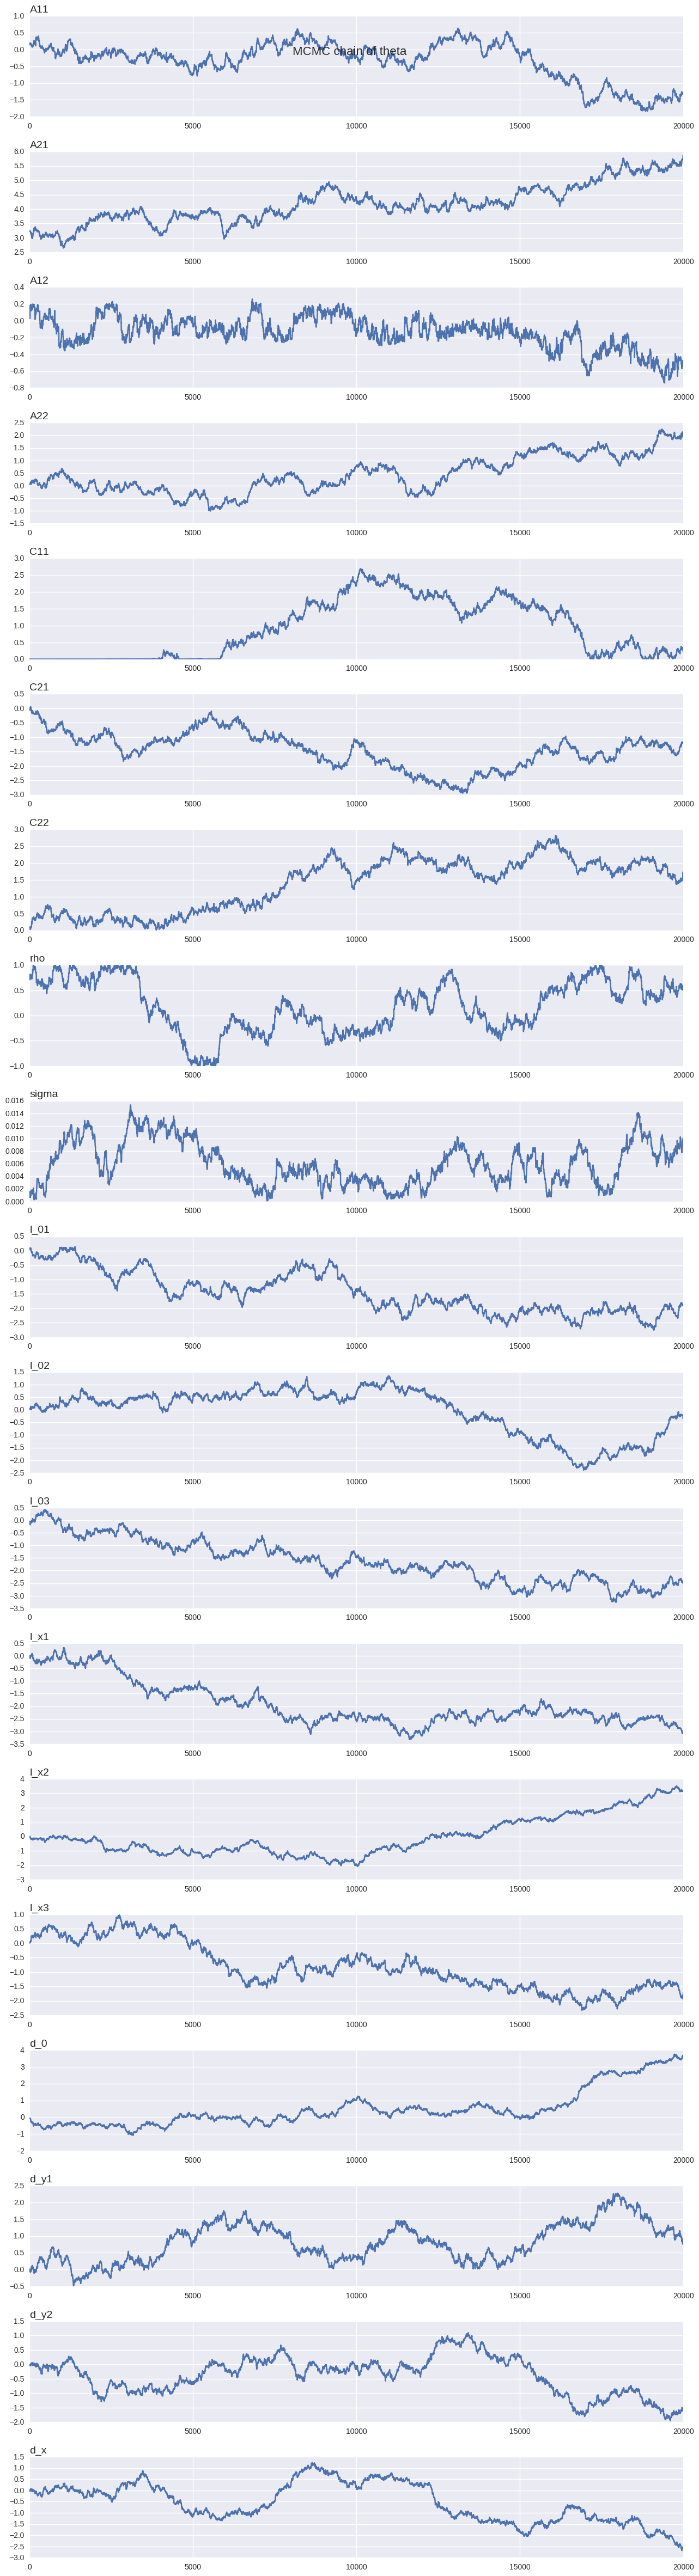

In [9]:
#============================================
# Theta draws
#============================================

theta_draws = pd.DataFrame(data =[])
theta_draws_files = []

for i in range(InputParams['num_mcmc_files'] + 1):
    file = pd.read_csv(folder + InputParams['project_name'] + '.theta.00{}.dat'.format(i), header=None)
    dim = np.asarray(file[:2], dtype=int).squeeze()
    theta_draws_files.append(pd.DataFrame(data=np.asarray(file[2:]).reshape(dim[1], dim[0])))
    theta_draws = pd.concat([theta_draws, theta_draws_files[i]], axis=0)

theta_draws.index = range(num_draws)
theta_draws.columns = list_all

fig, ax = plt.subplots(numb_active, 1, figsize=(13, 2.5*numb_active))
for i, val in enumerate(list_active):
    theta_draws.iloc[burnin::second_thinning, :][val].plot(ax=ax[i])
    ax[i].set_title(val, fontsize=14, loc='left')

plt.suptitle('MCMC chain of theta', fontsize=16)
plt.tight_layout()
plt.savefig(folder + 'figures/mcmc_chain_theta.png')

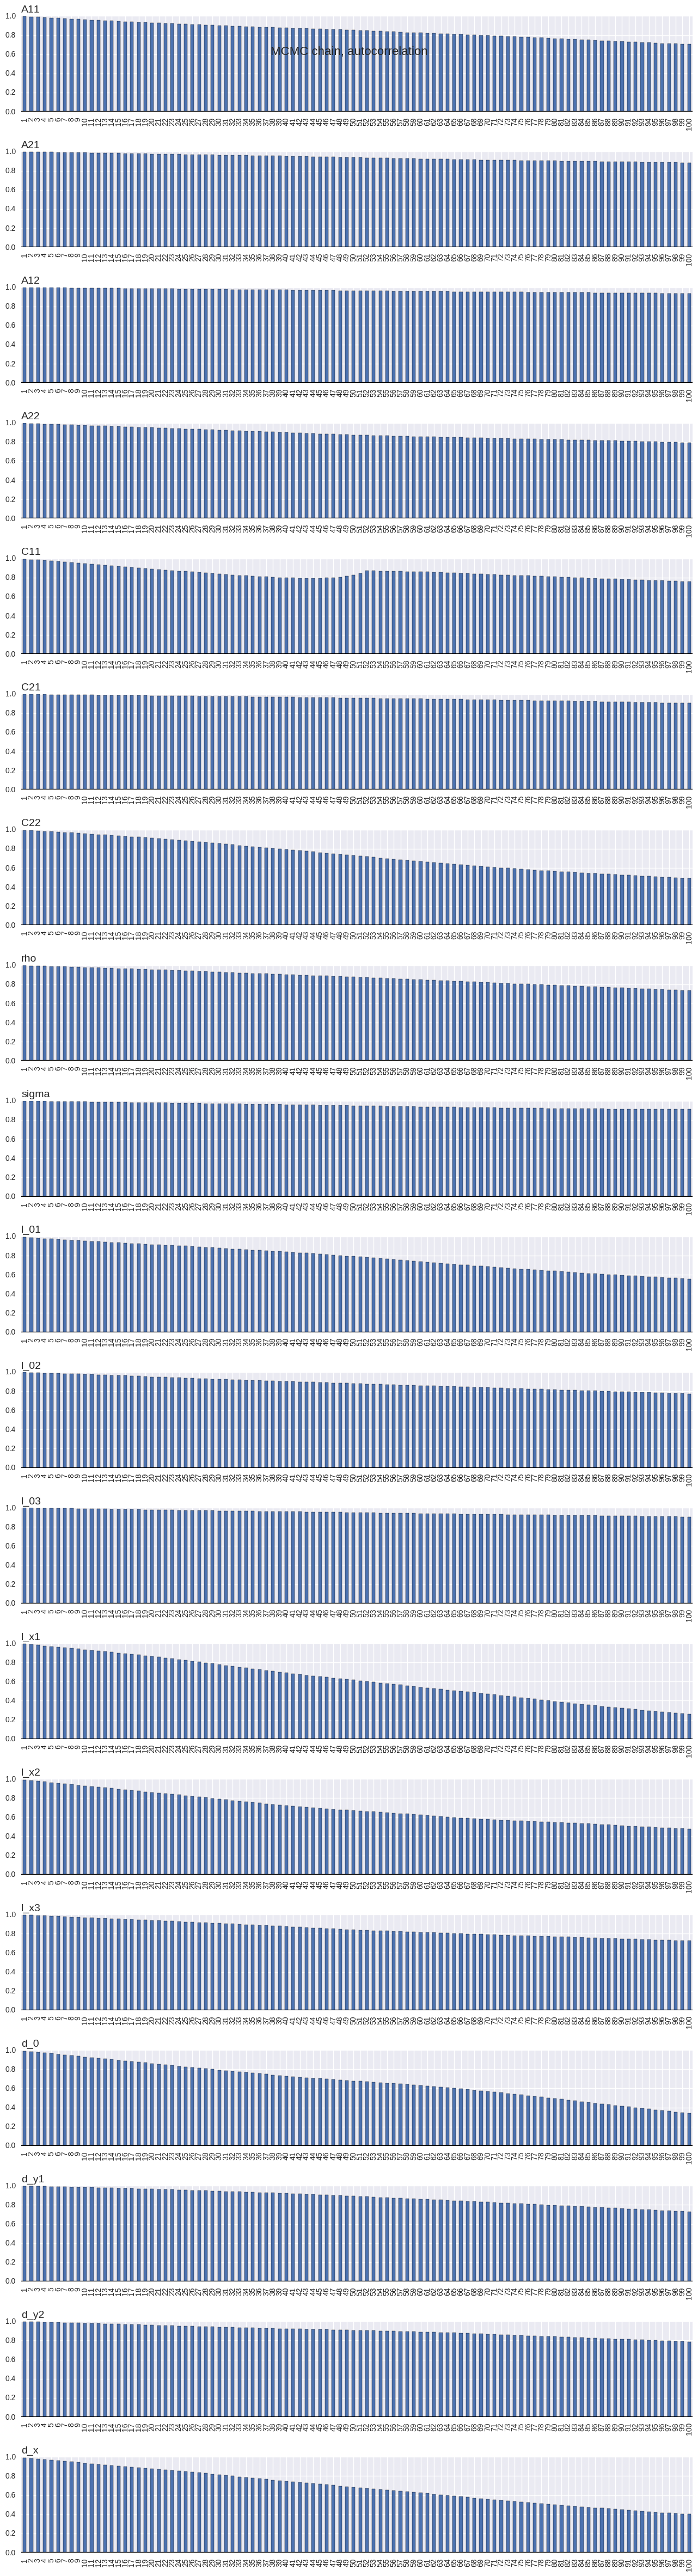

In [10]:
autocorr = np.zeros((numb_active, 100))

for i, val in enumerate(list_active):
    for lag in range(1, 101):
        autocorr[i, lag-1] = theta_draws.iloc[burnin::second_thinning, :][val].autocorr(lag=lag)
AC = pd.DataFrame(data=autocorr.T, columns=list_active, index=np.arange(1, 101))

fig, ax = plt.subplots(numb_active, 1, figsize = (13, 2.5*numb_active))
for i, val in enumerate(list_active):
    AC[val].plot(ax=ax[i], kind='bar')
    ax[i].set_title(val, fontsize=14, loc='left')
    ax[i].axhline(0, color='k')
#    ax[i].set_ylim([-.3, 1])
    
fig.suptitle('MCMC chain, autocorrelation', fontsize=16)
plt.tight_layout()
plt.savefig(folder + 'figures/mcmc_chain_autocorr.png')

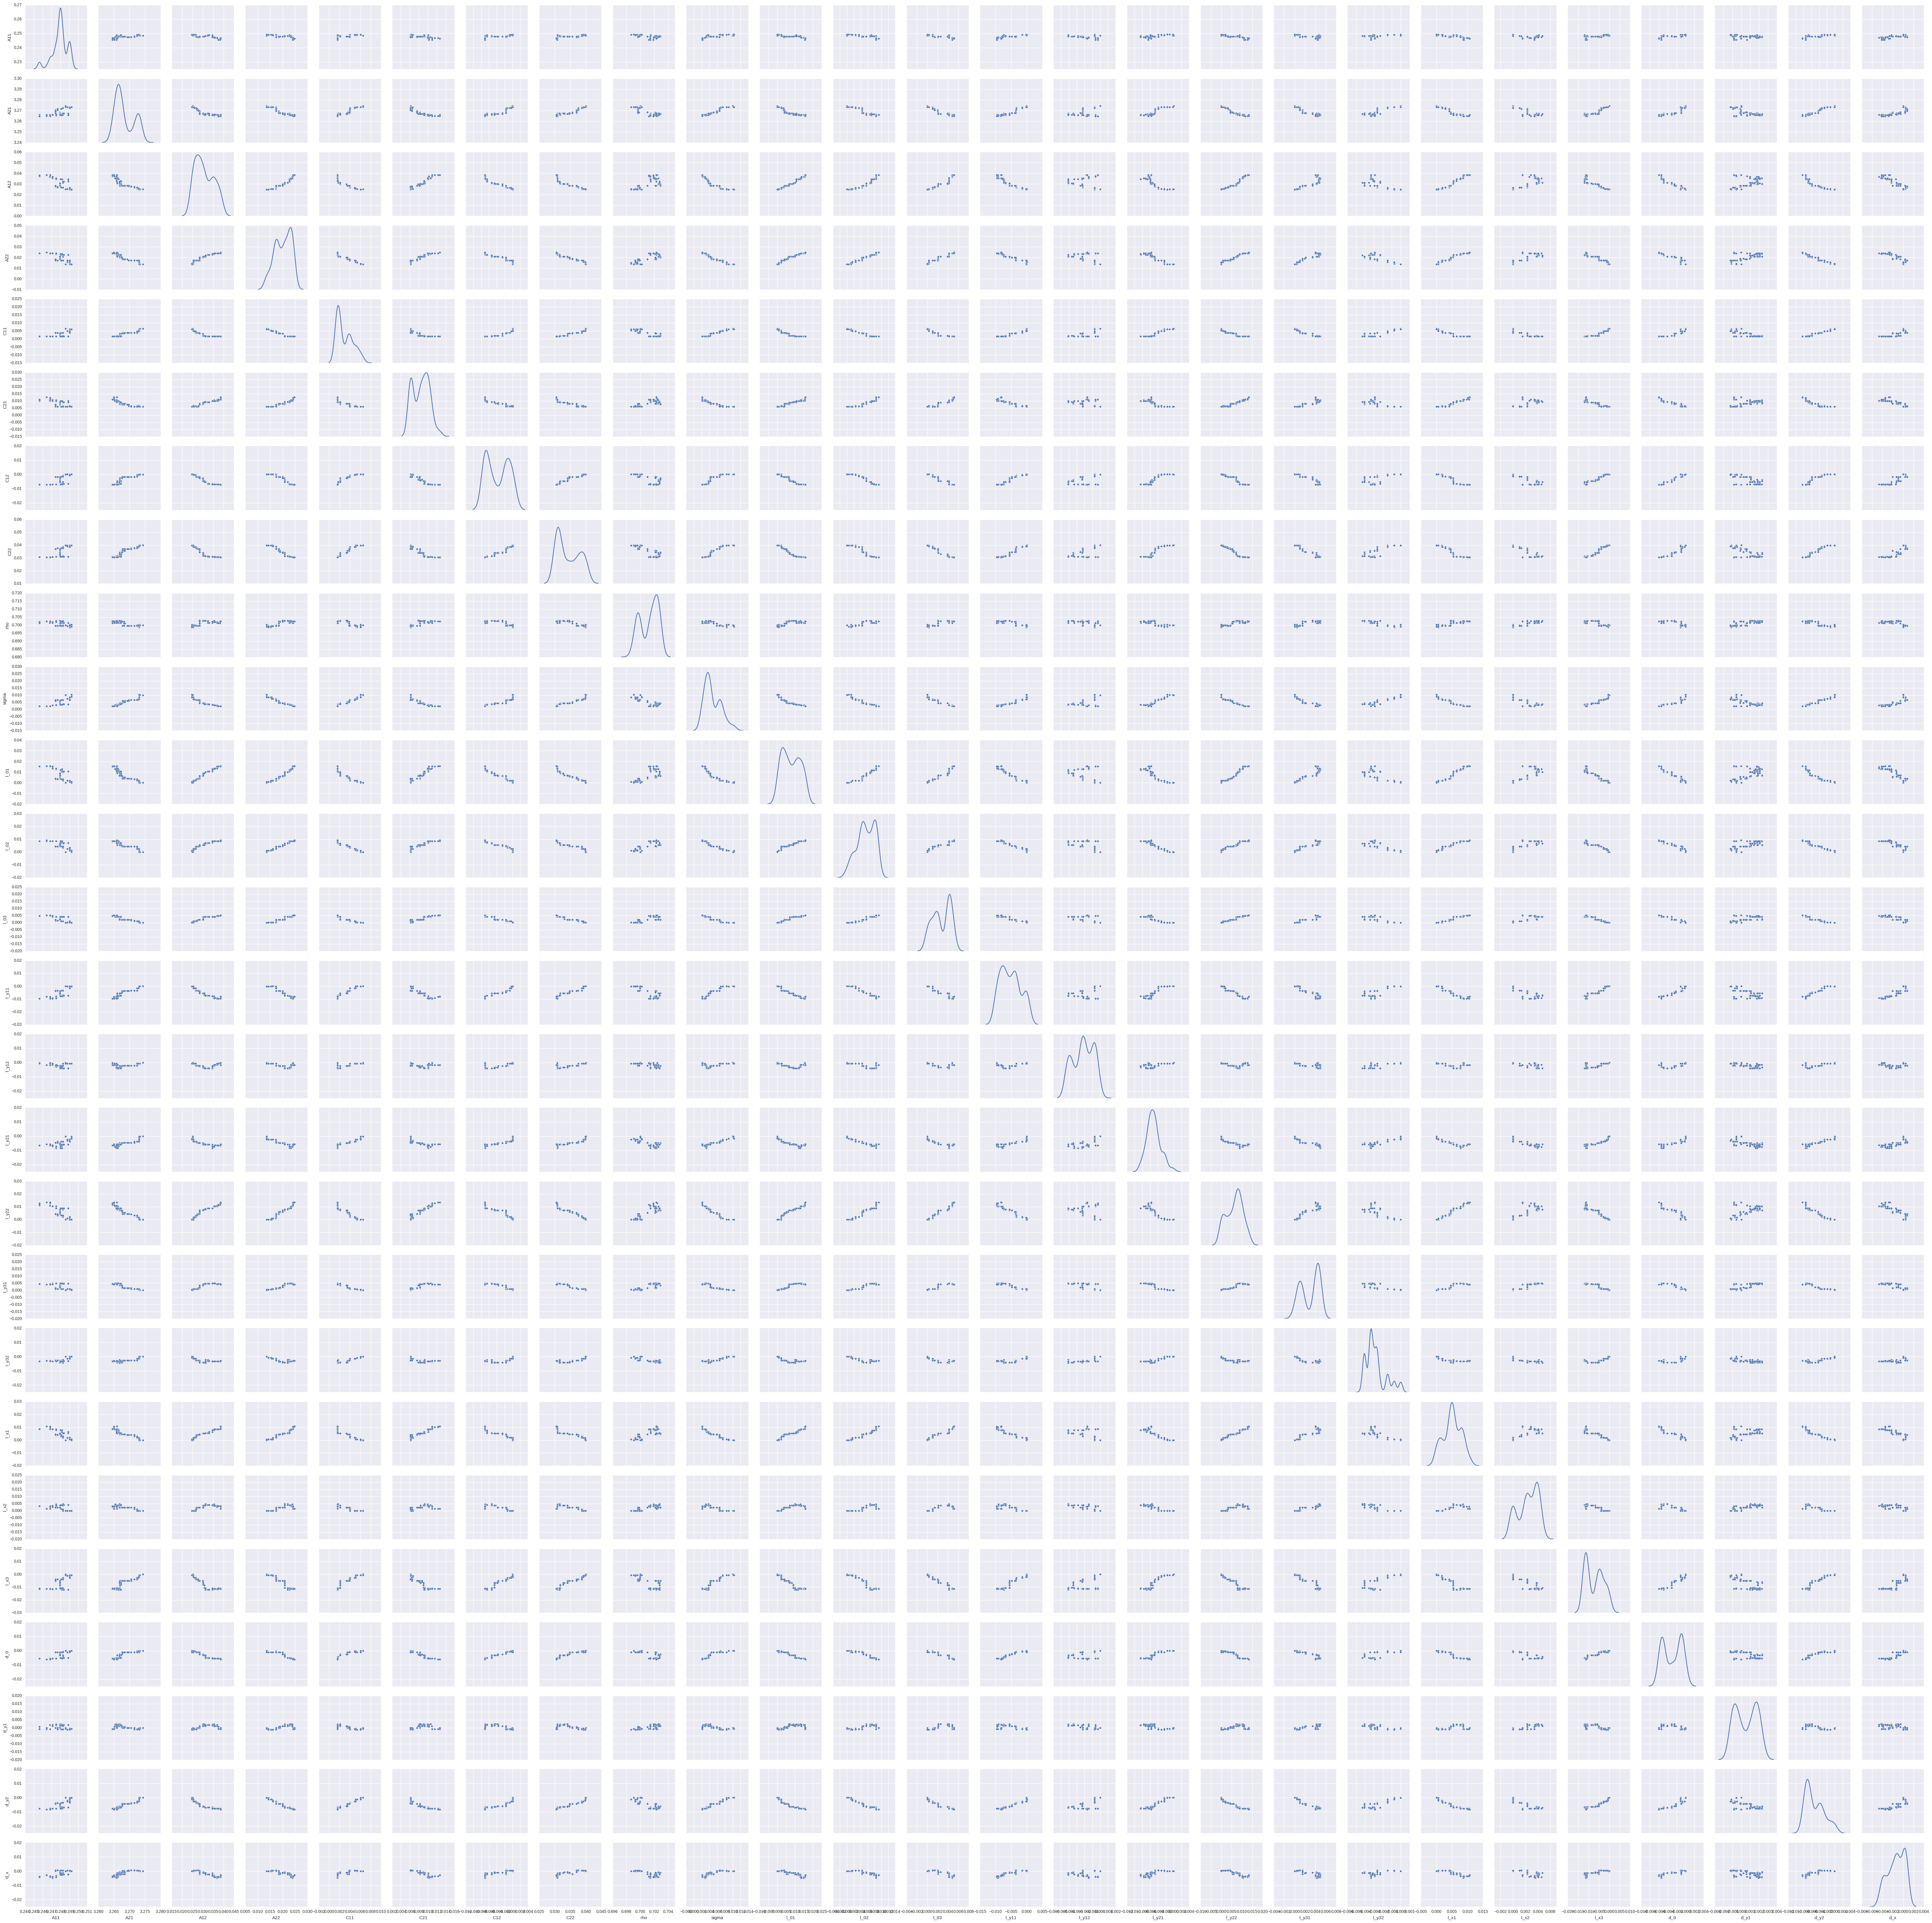

In [16]:
sns.pairplot(theta_draws.iloc[burnin::second_thinning][list_active], diag_kind='kde')
plt.savefig(folder + 'figures/mcmc_chain_posterior.png')

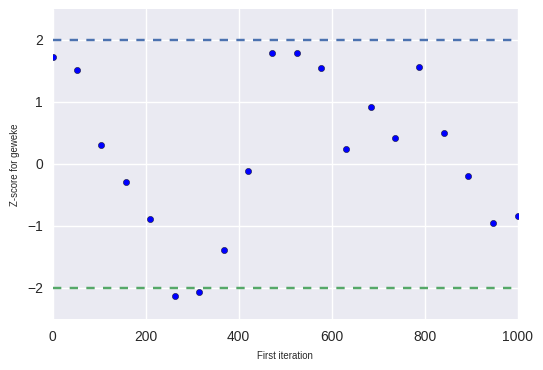

In [50]:
scores = geweke(np.asarray(theta_draws.iloc[burnin::second_thinning, 1]))
geweke_plot(scores, name='geweke', format='png', suffix='-diagnostic', path='./')

-------------------------------------
## MCMC chain for theta at times when the particle filter got updated

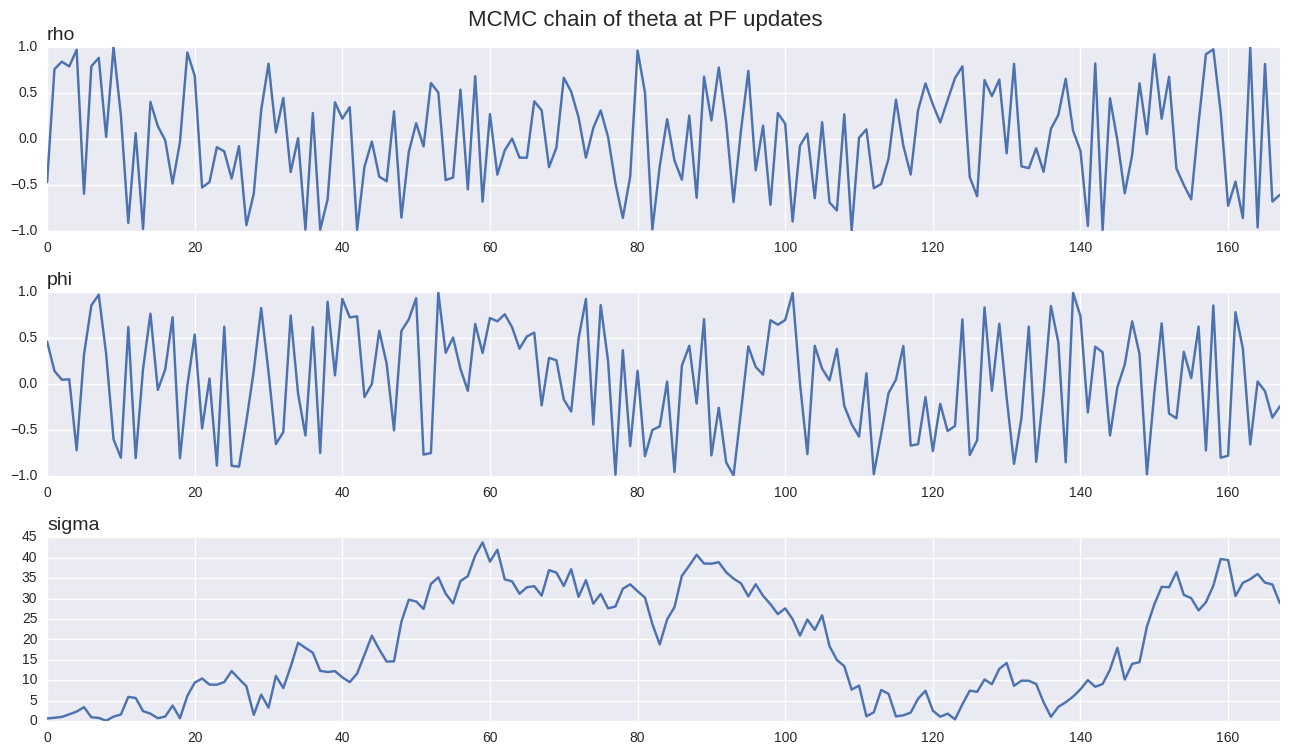

In [51]:
#============================================
# Gibbs draws
#============================================

gibbs_draws = pd.DataFrame(data =[])

for i in range(InputParams['num_mcmc_files'] + 1):
    file = pd.read_csv(folder + InputParams['project_name'] + 
                       '.usrvar.gibbs_draws.00{}.dat'.format(i), header=None)
    dim = np.asarray(file[:2], dtype=int).squeeze()
    gibbs_draws = pd.concat([gibbs_draws, 
                                 pd.DataFrame(data=np.asarray(file[2:]).reshape(dim[1], dim[0]))], axis=0)

gibbs_draws.index = range(gibbs_draws.shape[0])
gibbs_draws.columns = list_all

fig, ax = plt.subplots(numb_active, 1, figsize=(13, 2.5*numb_active))
for i, val in enumerate(list_active): 
    gibbs_draws.iloc[:, :][val].plot(ax=ax[i])
    ax[i].set_title(val, fontsize=14, loc='left')
    
plt.suptitle('MCMC chain of theta at PF updates', y=1.0, fontsize=16)
plt.tight_layout()
plt.savefig(folder + 'figures/gibbs_draws_theta.png')

-------------------
## Posterior (and prior) values along the MCMC chain

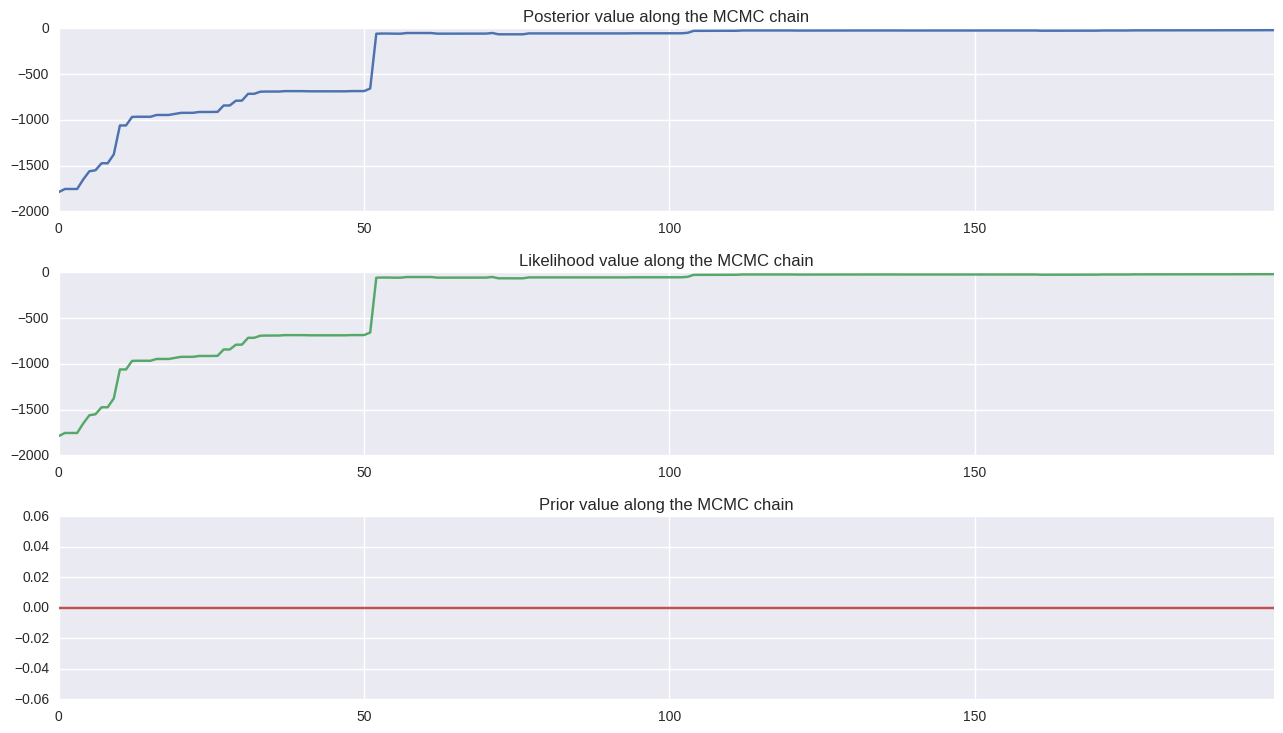

In [12]:
#============================================
# Posterior draws
#============================================

pi_draws = pd.DataFrame(data =[])

for i in range(InputParams['num_mcmc_files'] + 1):
    file = pd.read_csv(folder + InputParams['project_name'] + '.pi.00{}.dat'.format(i), header=None)
    dim = np.asarray(file[:2], dtype=int).squeeze()
    pi_draws = pd.concat([pi_draws, 
                          pd.DataFrame(data=np.asarray(file[2:]).reshape(dim[1], dim[0]))], axis=0)

pi_draws.index = range(num_draws)
pi_draws.columns = ['posterior', 'likelihood', 'prior']

fig, ax = plt.subplots(3, 1, figsize=(13, 7.5))
pi_draws.iloc[::second_thinning, 0].plot(ax=ax[0])
ax[0].set_title('Posterior value along the MCMC chain')
ax[0].set_ylim([-2000, 0])
pi_draws.iloc[::second_thinning, 1].plot(ax=ax[1], color=colors[1])
ax[1].set_title('Likelihood value along the MCMC chain')
ax[1].set_ylim([-2000, 0])
pi_draws.iloc[::second_thinning, 2].plot(ax=ax[2], color=colors[2])
ax[2].set_title('Prior value along the MCMC chain')
plt.tight_layout()
plt.savefig(folder + 'figures/posterior_along_chain.png')

In [13]:
pi_draws

posterior   likelihood  prior
0   -1789.275954 -1789.275954    0.0
1   -1756.183954 -1756.183954    0.0
2   -1756.175167 -1756.175167    0.0
3   -1756.193959 -1756.193959    0.0
4   -1651.453714 -1651.453714    0.0
5   -1562.470296 -1562.470296    0.0
6   -1551.530363 -1551.530363    0.0
7   -1475.032629 -1475.032629    0.0
8   -1475.158999 -1475.158999    0.0
9   -1378.173231 -1378.173231    0.0
10  -1061.831159 -1061.831159    0.0
11  -1061.814958 -1061.814958    0.0
12   -968.247997  -968.247997    0.0
13   -966.428235  -966.428235    0.0
14   -966.448525  -966.448525    0.0
15   -966.881852  -966.881852    0.0
16   -947.290565  -947.290565    0.0
17   -947.066337  -947.066337    0.0
18   -947.032379  -947.032379    0.0
19   -935.713524  -935.713524    0.0
20   -924.160813  -924.160813    0.0
21   -923.848828  -923.848828    0.0
22   -923.428353  -923.428353    0.0
23   -914.383100  -914.383100    0.0
24   -914.372369  -914.372369    0.0
25   -914.338788  -914.338788    0.0
26   -913.086701  -913.086701    0.0
27   -843.270735  -843.270735    0.0
28   -843.295469  -843.295469    0.0
29   -791.369755  -791.369755    0.0
..           ...          ...    ...
170   -25.274380   -25.274380    0.0
171   -23.646640   -23.646640    0.0
172   -23.645587   -23.645587    0.0
173   -23.634586   -23.634586    0.0
174   -23.638565   -23.638565    0.0
175   -23.632551   -23.632551    0.0
176   -22.296614   -22.296614    0.0
177   -22.300191   -22.300191    0.0
178   -22.255740   -22.255740    0.0
179   -22.258907   -22.258907    0.0
180   -22.258906   -22.258906    0.0
181   -22.248139   -22.248139    0.0
182   -22.266917   -22.266917    0.0
183   -22.265101   -22.265101    0.0
184   -22.266817   -22.266817    0.0
185   -22.271814   -22.271814    0.0
186   -22.134144   -22.134144    0.0
187   -22.138527   -22.138527    0.0
188   -21.362329   -21.362329    0.0
189   -21.369814   -21.369814    0.0
190   -21.203262   -21.203262    0.0
191   -21.203874   -21.203874    0.0
192   -21.202320   -21.202320    0.0
193   -20.857388   -20.857388    0.0
194   -20.861158   -20.861158    0.0
195   -20.860712   -20.860712    0.0
196   -20.677343   -20.677343    0.0
197   -20.742876   -20.742876    0.0
198   -20.746128   -20.746128    0.0
199   -20.093419   -20.093419    0.0

[200 rows x 3 columns]

-------------------------------
## Particle Filter

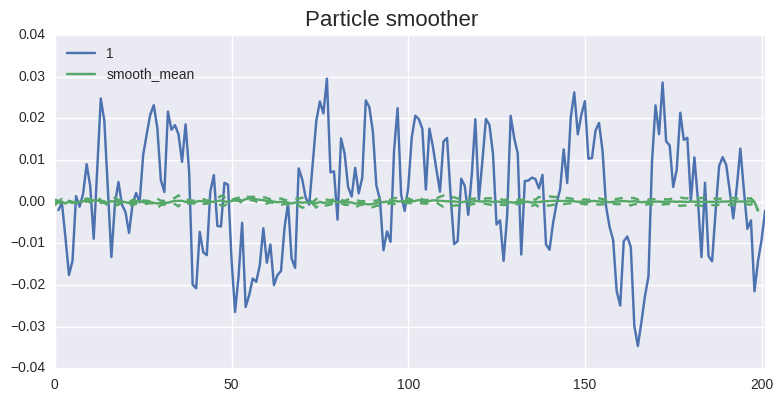

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

particle_filter = pd.read_csv(folder + 'test.usrvar.filter.009.dat')
particle = pd.read_csv('../data/initial_particle.dat')
particle.iloc[1:, :].plot(ax=ax)
particle_filter.iloc[:, [0]].plot(ax=ax)
(particle_filter.iloc[:, 0] + 2*particle_filter.iloc[:, 1]).plot(ax=ax, linestyle='--', color=colors[1])
(particle_filter.iloc[:, 0] - 2*particle_filter.iloc[:, 1]).plot(ax=ax, linestyle='--', color=colors[1])
plt.suptitle('Particle smoother', fontsize=16, y=1.0)
plt.ylim([-.04, .04])
plt.tight_layout()
plt.savefig(folder + 'figures/particle_smoother.png')

In [24]:
particle_filter

smooth_mean   smooth_sdev   filter_mean   filter_sdev         x         y
0      -0.005961  3.993860e-17     -0.000097  2.883390e-03  0.027880  0.004208
1       0.000329  1.085290e-19     -0.003830  3.559740e-17  0.003053 -0.004617
2       0.003827  2.127160e-17      0.000952  1.627930e-18  0.009536  0.016179
3       0.001857  1.953520e-18      0.003991  1.736460e-18 -0.006327 -0.037039
4      -0.003825  3.429510e-17     -0.003676  2.213990e-17 -0.057038 -0.030339
5      -0.001939  9.984650e-18     -0.003113  1.475990e-17  0.003374  0.036484
6      -0.000812  2.279100e-18     -0.000727  4.124090e-18 -0.001187 -0.001903
7       0.000461  2.387630e-18     -0.001222  2.170580e-18  0.027880  0.004208
8      -0.000098  8.275320e-19     -0.001857  8.682300e-18  0.003528  0.012225
9       0.002723  2.951980e-17      0.001886  9.333480e-18 -0.008687 -0.023174
10     -0.001069  8.682300e-19      0.000303  3.255860e-18 -0.043174 -0.025062
11     -0.003667  3.299280e-17     -0.000737  4.015570e-18  0.002400  0.034195
12      0.012747  1.059240e-16      0.012747  1.059240e-16 -0.021299 -0.000416
13      0.007747  1.736460e-17      0.004879  3.038810e-17 -0.001187 -0.001903
14      0.005296  1.556160e-04      0.002318  1.475990e-17  0.003631  0.011957
15      0.003872  9.536680e-06      0.001227  6.077610e-18 -0.009041 -0.024513
16      0.006598  7.518930e-05      0.002816  1.258930e-17 -0.044513 -0.025075
17      0.013480  1.225390e-04      0.013485  2.778340e-17  0.002136  0.034026
18      0.007144  1.488640e-04      0.008008  1.093970e-16  0.025006  0.002689
19      0.009699  1.788930e-04      0.006905  7.206310e-17 -0.021299 -0.000416
20     -0.000541  1.390520e-04     -0.000547  3.364390e-18  0.007867  0.015046
21     -0.002105  1.183450e-04      0.000536  4.558210e-18 -0.007023 -0.033343
22     -0.000191  1.056360e-05     -0.000192  9.224950e-19 -0.053343 -0.028857
23      0.001496  2.685640e-05      0.000897  7.922600e-18  0.003071  0.035831
24      0.016147  6.118640e-04      0.016175  5.209380e-17  0.049829 -0.002187
25      0.009676  9.333910e-05      0.011759  1.406530e-16  0.025006  0.002689
26      0.023083  6.587510e-04      0.023113  1.354440e-16  0.009134  0.016991
27      0.017385  1.375500e-06      0.017416  1.875380e-16 -0.005209 -0.033448
28      0.005175  2.197300e-04      0.005165  3.125630e-17 -0.053448 -0.030071
29      0.000070  1.044460e-04      0.002400  4.341150e-19  0.004135  0.037088
..           ...           ...           ...           ...       ...       ...
170     0.028518  7.287580e-04      0.028551  3.056170e-16 -0.001906  0.009627
171     0.022118  1.017910e-04      0.019847  9.376890e-17 -0.009634 -0.011788
172     0.013484  1.160480e-04      0.013479  5.730320e-17 -0.031788 -0.019680
173     0.008015  7.088250e-05      0.006433  2.951980e-17  0.001967  0.033170
174     0.007678  1.265000e-04      0.007684  4.775270e-17  0.041135 -0.004972
175     0.004680  1.607550e-04      0.008268  6.772200e-17 -0.059811 -0.004998
176     0.014783  4.904030e-04      0.014805  7.987720e-17  0.010922  0.016628
177     0.009815  2.559100e-05      0.009244  1.041880e-17 -0.006358 -0.037981
178     0.000214  2.647030e-04      0.000203  2.441900e-19 -0.057981 -0.032173
179    -0.000120  6.816130e-05     -0.001641  8.465250e-18  0.003531  0.036347
180     0.000312  7.345930e-05      0.000315  1.031020e-18  0.015570  0.003802
181     0.000287  6.645940e-05      0.001770  1.432580e-17  0.041135 -0.004972
182     0.004509  2.314210e-04      0.004519  1.215520e-17  0.008344  0.017470
183     0.000605  2.734060e-04      0.006706  1.475990e-17 -0.004303 -0.033378
184    -0.014291  9.146170e-04     -0.014332  6.772200e-17 -0.053378 -0.028644
185    -0.009080  9.787100e-06     -0.009298  1.024510e-16  0.004415  0.037911
186     0.008516  6.787810e-04      0.008547  8.855950e-17  0.013691  0.006720
187     0.004537  6.618920e-05      0.006014  2.170580e-17  0.015570  0.003802
188     0.008795  1.195270e-04      0.008800  7.466780e

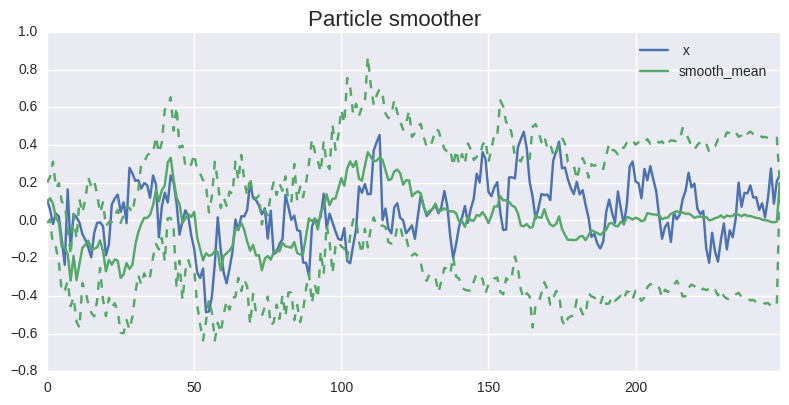

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))

particle_filter = pd.read_csv(folder + 'svsim.usrvar.filter.000.dat')
particle_filter.iloc[:, [-2, 0]].plot(ax=ax)
(particle_filter.iloc[:, 0] + 2*particle_filter.iloc[:, 1]).plot(ax=ax, linestyle='--', color=colors[1])
(particle_filter.iloc[:, 0] - 2*particle_filter.iloc[:, 1]).plot(ax=ax, linestyle='--', color=colors[1])
plt.suptitle('Particle smoother', fontsize=16, y=1.0)
plt.tight_layout()
plt.savefig(folder + 'figures/particle_smoother.png')

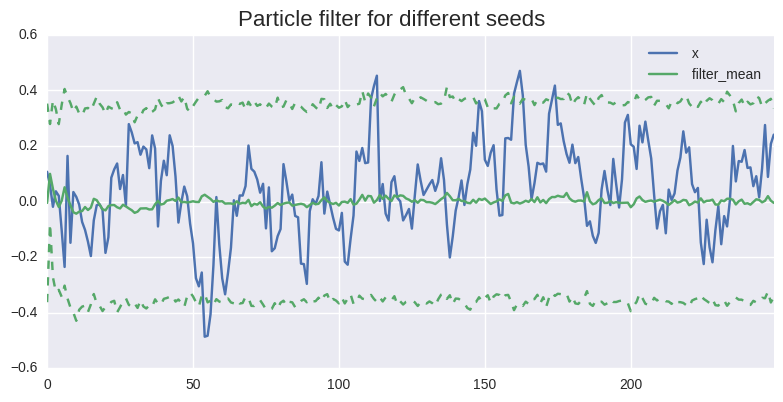

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))

particle_filter = pd.read_csv(folder + '/svsim.usrvar.filter.009.dat')
particle_filter.iloc[:, [-2, 2]].plot(ax=ax)
(particle_filter.iloc[:, 2] + 2*particle_filter.iloc[:, 3]).plot(ax=ax, linestyle='--', color=colors[1])
(particle_filter.iloc[:, 2] - 2*particle_filter.iloc[:, 3]).plot(ax=ax, linestyle='--', color=colors[1])
plt.suptitle('Particle filter for different seeds', fontsize=16, y=1.0)
plt.tight_layout()
plt.savefig(folder + 'figures/particle_filter.png')

(-0.6, 0.6)

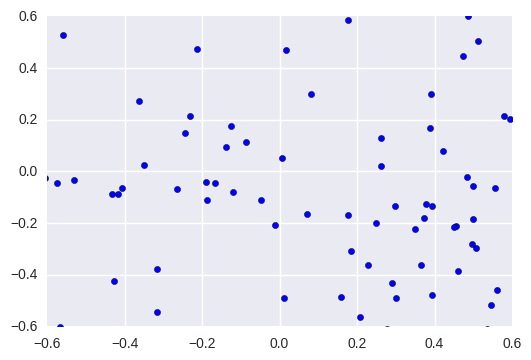

In [43]:
plt.scatter(x=particle_filter.iloc[:, -2], y=particle_filter.iloc[:, 0])
plt.xlim([-.6, .6])
plt.ylim([-.6, .6])

(-0.6, 0.6)

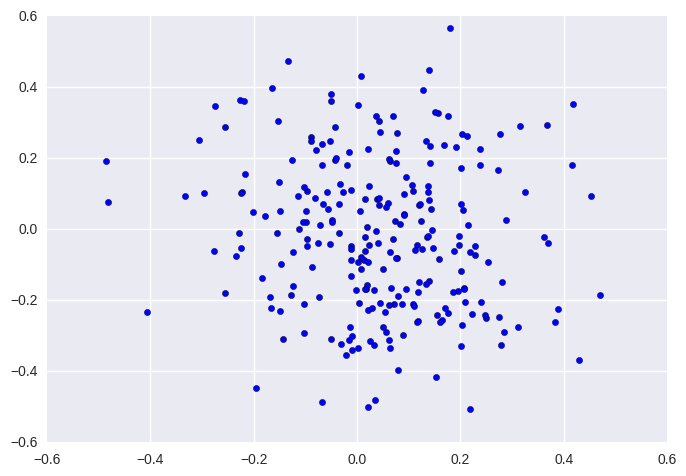

In [12]:
plt.scatter(x=particle_filter.iloc[:, -2], y=particle_filter.iloc[:, 2])
plt.xlim([-.6, .6])
plt.ylim([-.6, .6])

--------------------------------------
## Read data

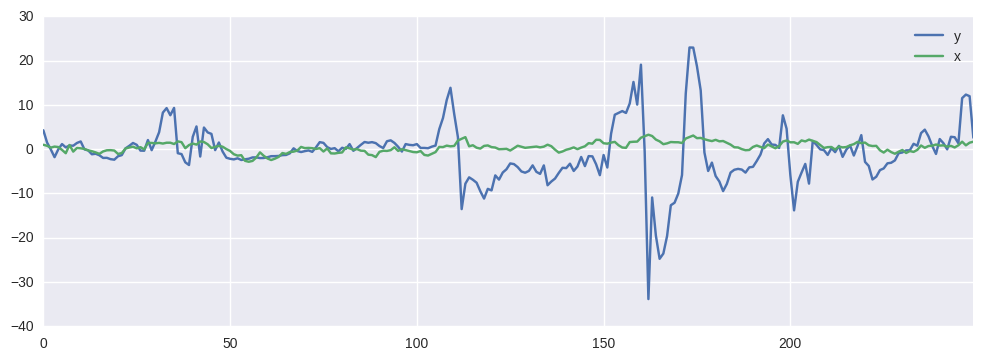

In [17]:
sample_size = InputParams['sample_size']
data = pd.read_csv('../data/svsim.dat', sep='\s+', header=None)
data.columns = ['y', 'x']
data = data[:sample_size]

fig, ax = plt.subplots(figsize=(12, 4))
data.plot(ax=ax)

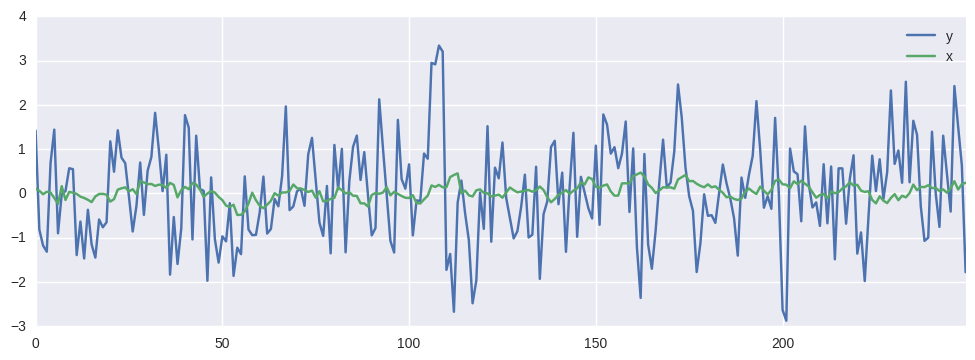

In [20]:
sample_size = InputParams['sample_size']
data = pd.read_csv('../data/svsim.dat', sep='\s+', header=None)
data.columns = ['y', 'x']
data = data[:sample_size]

fig, ax = plt.subplots(figsize=(12, 4))
data.plot(ax=ax)

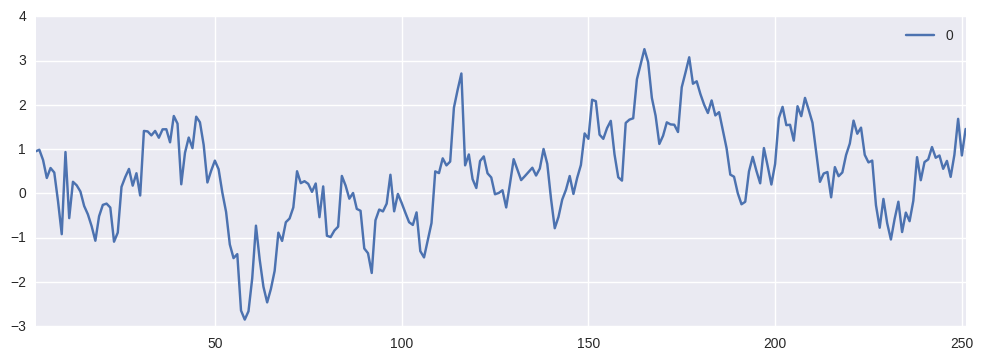

In [18]:
true_x = pd.read_csv('../data/svparticle.dat', sep='\s+', header=None)
true_x_dim = np.asarray(true_x[:2], dtype=int)
true_x = true_x[2:sample_size+2]

fig, ax = plt.subplots(figsize=(12, 4))
true_x.plot(ax=ax)

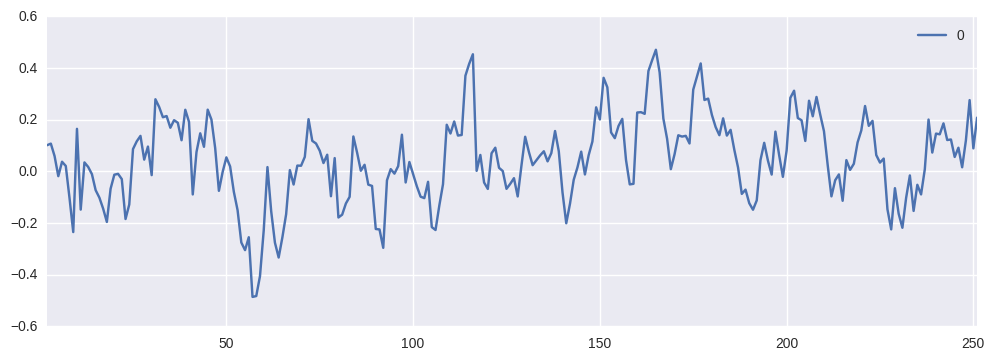

In [21]:
true_x = pd.read_csv('../data/svparticle.dat', sep='\s+', header=None)
true_x_dim = np.asarray(true_x[:2], dtype=int)
true_x = true_x[2:sample_size+2]

fig, ax = plt.subplots(figsize=(12, 4))
true_x.plot(ax=ax)